In [1]:
!nvidia-smi

Sat Oct 12 21:39:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              45W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 36.3/235.7 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

import roboflow

roboflow.login()

from roboflow import Roboflow
rf = Roboflow(api_key="CPtHJgPmKnL5ei7M3NGb")
project = rf.workspace("t5-capstone").project("people-detection-dsew1")
version = project.version(1)
dataset = version.download("yolov8")



/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to People-Detection-1 in yolov8:: 100%|██████████| 3344/3344 [00:00<00:00, 5998.63it/s]


In [6]:

import yaml

with open(f"{dataset.location}/data.yaml", 'r') as f:
    dataset_yaml = yaml.safe_load(f)
dataset_yaml["train"] = "../train/images"
dataset_yaml["val"] = "../valid/images"
dataset_yaml["test"] = "../test/images"
with open(f"{dataset.location}/data.yaml", 'w') as f:
    yaml.dump(dataset_yaml, f)


In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 318MB/s]
New https://pypi.org/project/ultralytics/8.3.11 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/People-Detection-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, ag

/content


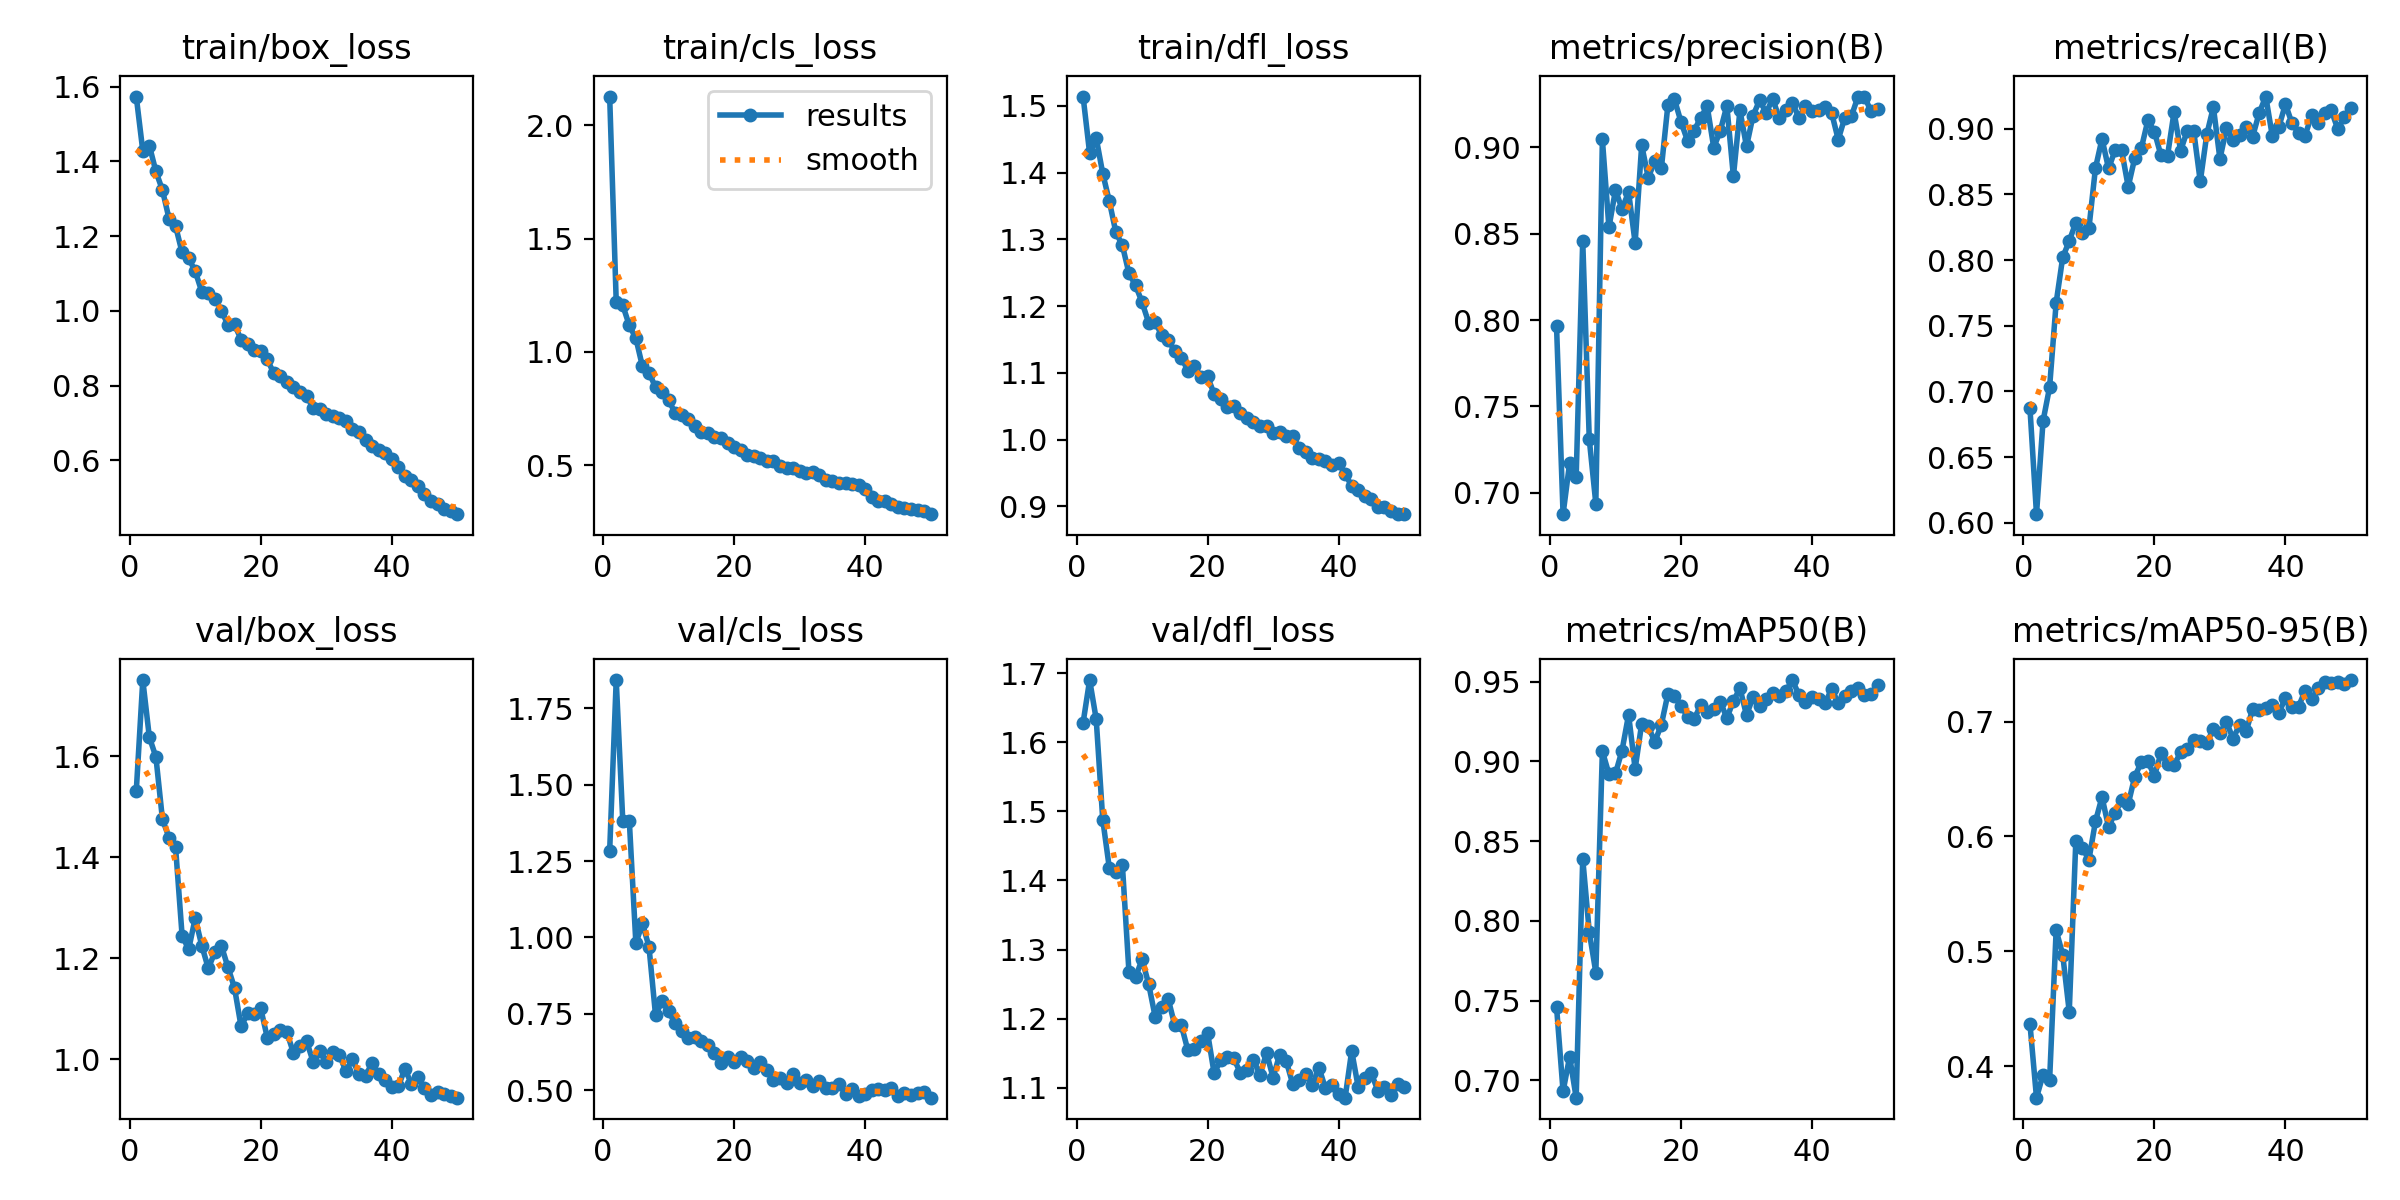

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


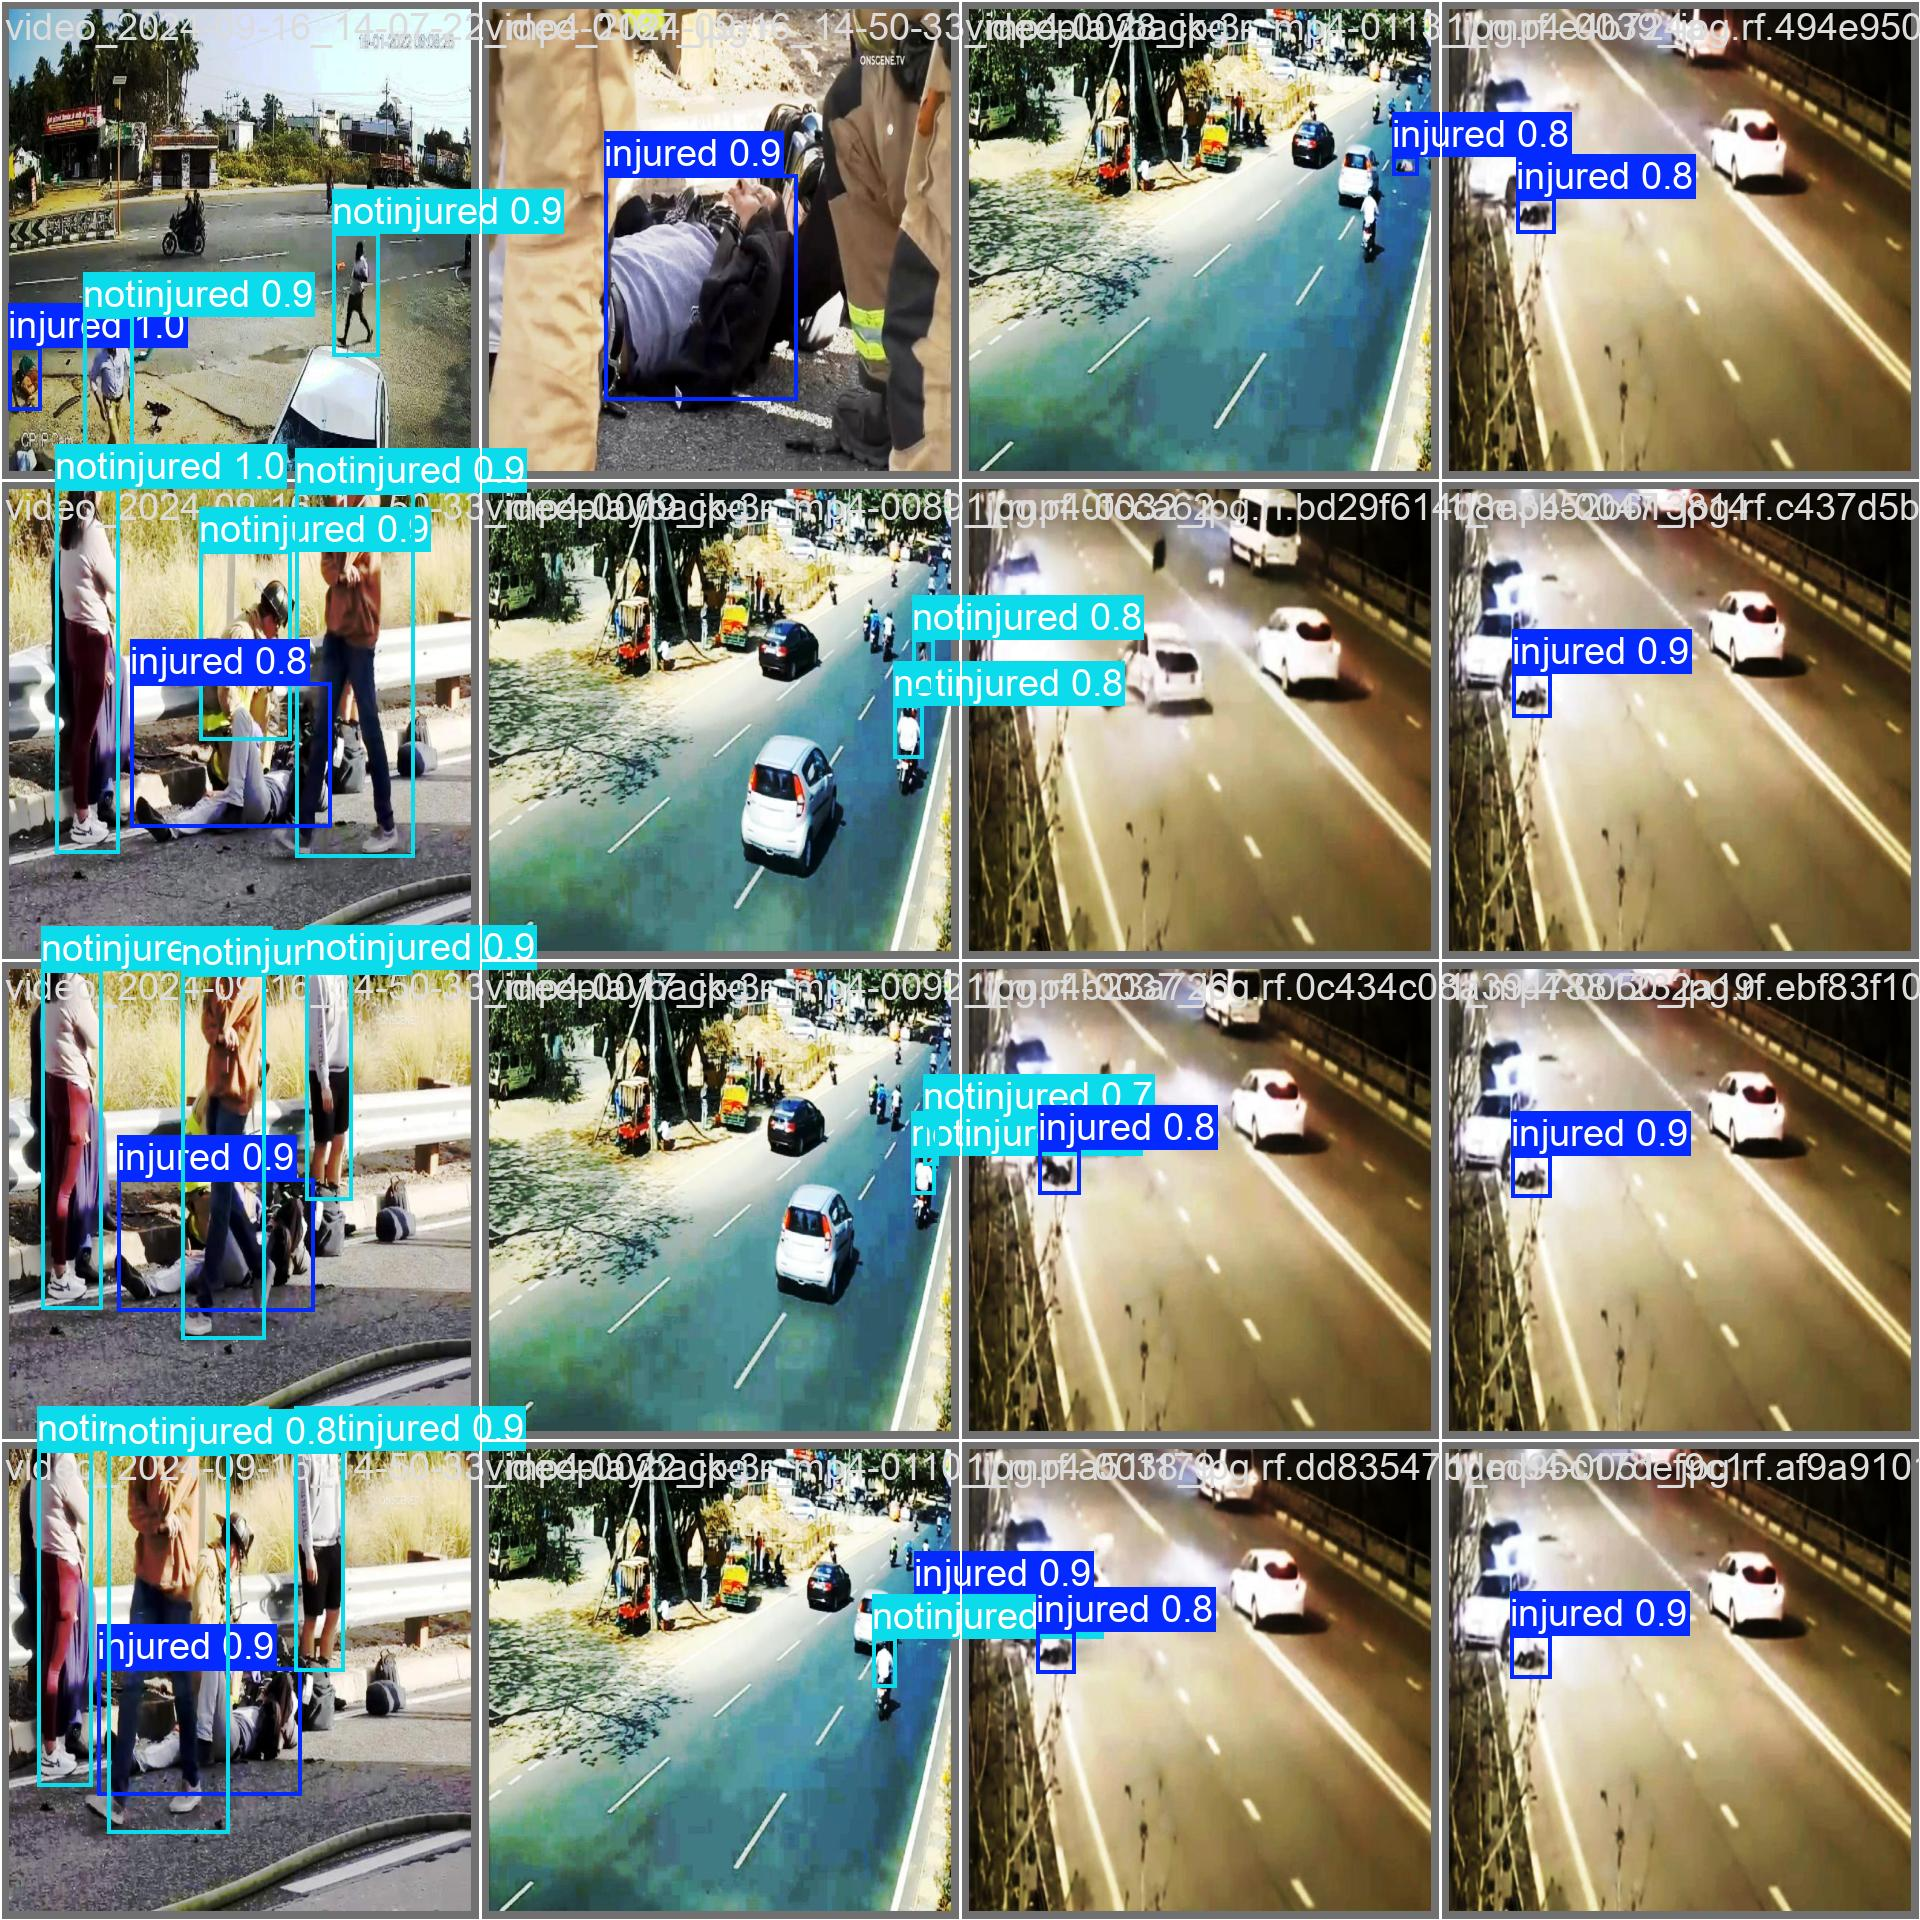

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [10]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/People-Detection-1/valid/labels.cache... 140 images, 0 backgrounds, 0 corrupt: 100% 140/140 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:03<00:00,  2.89it/s]
                   all        140        323      0.923      0.915      0.948      0.737
               injured        129        136      0.974      0.949      0.983      0.826
            notinjured         76        187      0.871      0.882      0.913      0.649
Speed: 2.4ms preprocess, 2.7ms inference, 0.0ms loss, 10.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [11]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/77 /content/datasets/People-Detection-1/test/images/1_mp4-0046_jpg.rf.15b6a5e0016e50da9fa969a7ab627532.jpg: 800x800 1 injured, 8.3ms
image 2/77 /content/datasets/People-Detection-1/test/images/1_mp4-0057_jpg.rf.119260f9fb9af37f269d163951d7d0d8.jpg: 800x800 1 injured, 8.0ms
image 3/77 /content/datasets/People-Detection-1/test/images/1_mp4-0064_jpg.rf.f9607f5720f77cbc507ba37f7fd3ee7c.jpg: 800x800 1 injured, 7.3ms
image 4/77 /content/datasets/People-Detection-1/test/images/1_mp4-0067_jpg.rf.a8d6e917d8997f35087aab8eef50fdcb.jpg: 800x800 1 injured, 1 notinjured, 6.9ms
image 5/77 /content/datasets/People-Detection-1/test/images/1_mp4-0072_jpg.rf.4176e86bdc79e9d61549486ea96089b9.jpg: 800x800 1 injured, 1 notinjured, 9.3ms
image 6/77 /content/datasets/People-Detection-1/test/images/1_mp4-0084_jp

In [12]:
image_path = "/content/datasets/People-Detection-1/test/images/1_mp4-0057_jpg.rf.119260f9fb9af37f269d163951d7d0d8.jpg"



image 1/1 /content/datasets/People-Detection-1/test/images/1_mp4-0057_jpg.rf.119260f9fb9af37f269d163951d7d0d8.jpg: 800x800 1 injured, 8.3ms
Speed: 3.6ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 800)


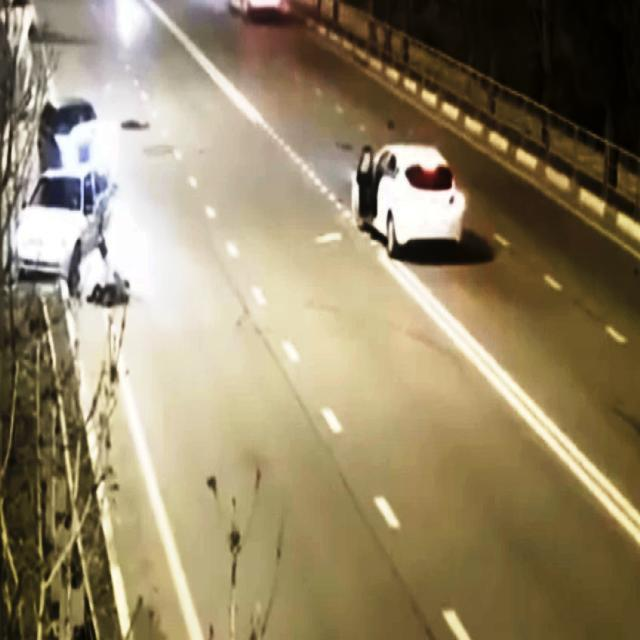

In [14]:
from ultralytics import YOLO
from IPython.display import display, Image

model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

results = model(image_path)

for result in results:
    result.plot()

display(Image(filename=image_path, width=600))


In [15]:
!ls /content/datasets/People-Detection-1/test/images


1_mp4-0046_jpg.rf.15b6a5e0016e50da9fa969a7ab627532.jpg
1_mp4-0057_jpg.rf.119260f9fb9af37f269d163951d7d0d8.jpg
1_mp4-0064_jpg.rf.f9607f5720f77cbc507ba37f7fd3ee7c.jpg
1_mp4-0067_jpg.rf.a8d6e917d8997f35087aab8eef50fdcb.jpg
1_mp4-0072_jpg.rf.4176e86bdc79e9d61549486ea96089b9.jpg
1_mp4-0084_jpg.rf.36df5a659438e151370efb012ea1783b.jpg
extremaly-tired-ungry-woman-after-260nw-681765703_webp_jpg.rf.04714d405ae3970bd969151eeb42f4d3.jpg
images-2-_jpg.rf.45566861b29944bb687aa4632dd808ab.jpg
IMG_4424_MOV-0000_jpg.rf.91f1b73dd540fbe3ba508fec08ea7ee4.jpg
IMG_4424_MOV-0008_jpg.rf.15d2e7915f506fb7b7e6ce559615f482.jpg
IMG_4424_MOV-0015_jpg.rf.51977557dfb064e482ae34ad06cba604.jpg
IMG_4424_MOV-0036_jpg.rf.c3ea11508b8c00b88b6e1940f6df6826.jpg
IMG_4424_MOV-0045_jpg.rf.11fa060e062dad4efecc57752ea79381.jpg
IMG_4424_MOV-0057_jpg.rf.1e6d8b7a3760191d6065cf6bab1a4053.jpg
Recording-2024-09-18-134002_mp4-0009_jpg.rf.5ccfb56519ecab46a5e042bb6dac4a75.jpg
Recording-2024-09-18-134002_mp4-0028_jpg.rf.f88181a220aa4b982efa

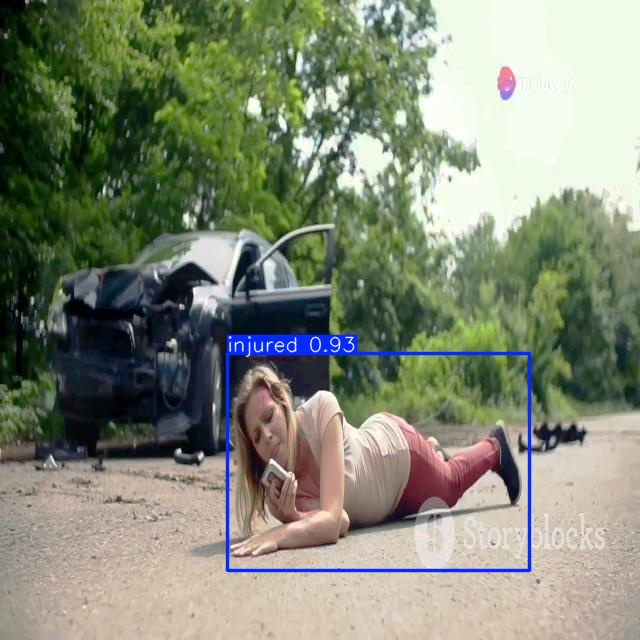

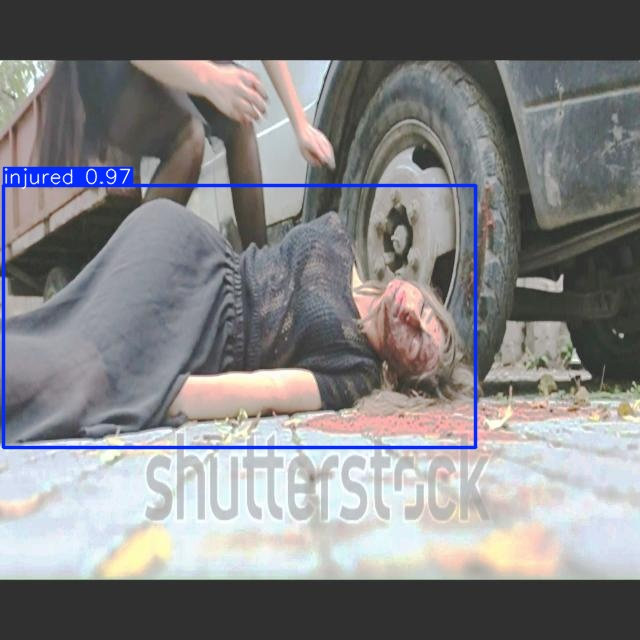

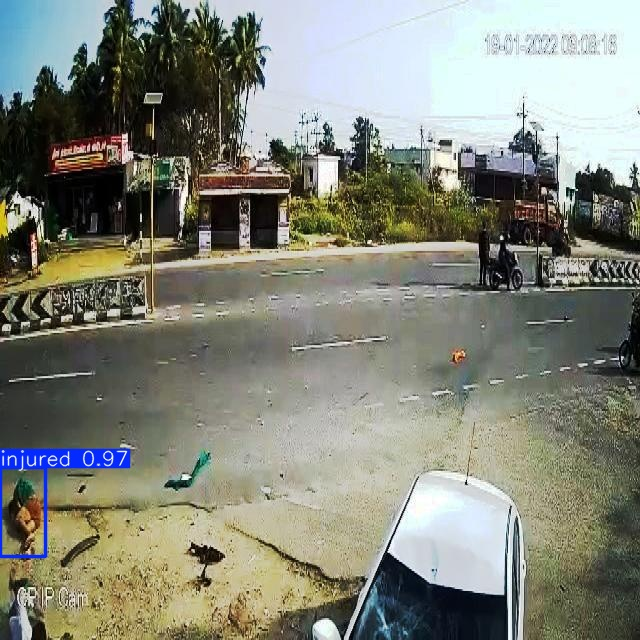

In [16]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [17]:
from ultralytics import YOLO
import os

model_path = os.path.join(os.getcwd(), 'best_local.pt')

model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

model.save(model_path)

print(f"model saved: {model_path}")


model saved: /content/best_local.pt
